In [1]:
from PIL import Image
import os
import numpy as np
from matplotlib import pyplot as plt

In [2]:
try:
    import google.colab, sys
    !git clone https://github.com/mualal/computer-vision-with-python.git
    sys.path.append('computer-vision-with-python')
    %cd computer-vision-with-python
except:
    import sys
    sys.path.append('..')

In [3]:
import harris

In [4]:
im = np.array(Image.open(os.path.join('images_input', 'Peterhof.jpg')).resize((504, 378)).convert('L'))
im

array([[189, 188, 187, ..., 173, 174, 173],
       [189, 188, 187, ..., 174, 173, 174],
       [189, 188, 188, ..., 173, 173, 172],
       ...,
       [ 81,  85,  86, ..., 116, 109, 105],
       [ 90, 100, 124, ..., 113, 115, 110],
       [ 92,  91,  91, ..., 112, 110, 108]], dtype=uint8)

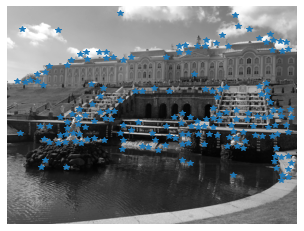

In [5]:
harris_im = harris.compute_harris_response(im)
filtered_coords = harris.get_harris_points(harris_im, threshold=0.1)
harris.plot_harris_points(im, filtered_coords)

Ищу соответствия


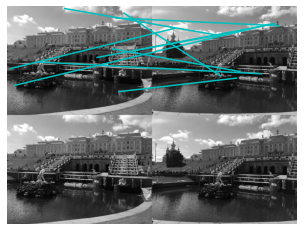

In [6]:
# нахождение соответствий; результат применения нормированной взаимной корреляции к блокам,
# окружающим угловые точки Харриса
im1 = np.array(Image.open(os.path.join('images_input', 'Peterhof.jpg')).resize((504, 378)).convert('L'))
im2 = np.array(Image.open(os.path.join('images_input', 'Peterhof2.jpg')).resize((504, 378)).convert('L'))
wid = 5

harris_im1 = harris.compute_harris_response(im1, sigma=5)
filtered_coords1 = harris.get_harris_points(harris_im1, min_dist=wid+1)
d1 = harris.get_descriptors(im1, filtered_coords1, wid)

harris_im2 = harris.compute_harris_response(im2, sigma=5)
filtered_coords2 = harris.get_harris_points(harris_im2, min_dist=wid+1)
d2 = harris.get_descriptors(im2, filtered_coords2, wid)

print('Ищу соответствия')
matches = harris.match_descriptors_twosided(d1, d2)
harris.plot_matches(im1, im2, filtered_coords1, filtered_coords2, matches[50:100])


In [7]:
import sift

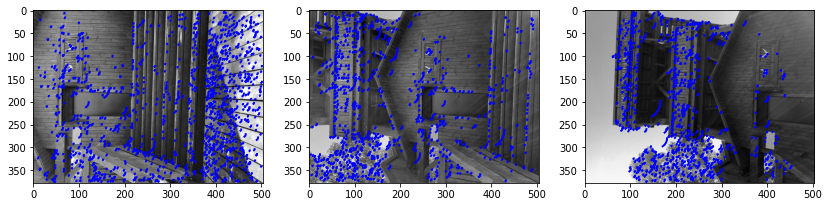

In [8]:
paths = [
    os.path.join('images_input', 'Kotlin1.jpg'),
    os.path.join('images_input', 'Kotlin2.jpg'),
    os.path.join('images_input', 'Kotlin3.jpg')
]
size = (504, 378)

plt.figure(figsize=(14, 5))
for i, path in enumerate(paths):
    plt.subplot(1, 3, i + 1)
    sift.plot_sift_points(path, size)

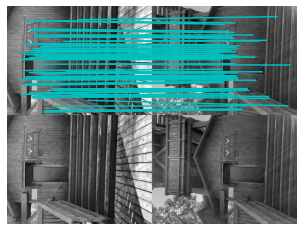

In [9]:
img1 = np.array(Image.open(os.path.join('images_input', 'Kotlin1.jpg')).resize((504, 378)).convert('L'))
img2 = np.array(Image.open(os.path.join('images_input', 'Kotlin2.jpg')).resize((504, 378)).convert('L'))

sift_points_1, descriptors_1 = sift.find_sift_points_and_descriptors(img1)
sift_points_2, descriptors_2 = sift.find_sift_points_and_descriptors(img2)

matches = sift.match_twosided(descriptors_1, descriptors_2)

sift.plot_matches(
    img1,
    img2,
    [(p.pt[1], p.pt[0]) for p in sift_points_1],
    [(p.pt[1], p.pt[0]) for p in sift_points_2],
    matches
)